OSsim) josephnatter@MacBook-Pro Final_Project % python simulator.py
=== Baseline CFS ===
{'policy': 'cfs', 'avg_latency': 8.36167577402031, 'p95': 37.807115018535136, 'throughput': 0.8903, 'completed': 8903, 'lfi': 0.24507454386221975}

=== CFS with Latency Boost Heuristic ===
Threshold=0.5, Boost=2.0: avg=6.185, p95=25.986, throughput=0.891, completed=8907, lfi=0.224
Threshold=1.0, Boost=2.0: avg=5.654, p95=22.076, throughput=0.891, completed=8908, lfi=0.228
Threshold=1.0, Boost=3.0: avg=5.221, p95=20.090, throughput=0.891, completed=8908, lfi=0.220

=== PPO training with alpha=0.6 beta=0.3 gamma=0.1 ===
PPO RL Agent: {'policy': "PPO_RL_{'alpha': 0.6, 'beta': 0.3, 'gamma': 0.1}", 'avg_latency': 8.090968002917231, 'p95': 30.84613847815183, 'throughput': 0.8906, 'completed': 8906, 'lfi': 0.2317084730829391}

=== PPO training with alpha=0.7 beta=0.2 gamma=0.1 ===
PPO RL Agent: {'policy': "PPO_RL_{'alpha': 0.7, 'beta': 0.2, 'gamma': 0.1}", 'avg_latency': 8.119688603463656, 'p95': 30.93051371882359, 'throughput': 0.8906, 'completed': 8906, 'lfi': 0.23098701050486756}

=== PPO training with alpha=0.5 beta=0.4 gamma=0.1 ===
PPO RL Agent: {'policy': "PPO_RL_{'alpha': 0.5, 'beta': 0.4, 'gamma': 0.1}", 'avg_latency': 8.17079845680435, 'p95': 33.94475131197373, 'throughput': 0.8906, 'completed': 8906, 'lfi': 0.22471065498595058}

=== PPO training with alpha=0.6 beta=0.3 gamma=0.2 ===
PPO RL Agent: {'policy': "PPO_RL_{'alpha': 0.6, 'beta': 0.3, 'gamma': 0.2}", 'avg_latency': 8.091069058385456, 'p95': 30.84613847815183, 'throughput': 0.8906, 'completed': 8906, 'lfi': 0.23171086351918935}

=== PPO training with alpha=0.4 beta=0.5 gamma=0.1 ===
PPO RL Agent: {'policy': "PPO_RL_{'alpha': 0.4, 'beta': 0.5, 'gamma': 0.1}", 'avg_latency': 8.090968002917231, 'p95': 30.84613847815183, 'throughput': 0.8906, 'completed': 8906, 'lfi': 0.2317084730829391}

=== PPO training with alpha=0.5 beta=0.3 gamma=0.2 ===
PPO RL Agent: {'policy': "PPO_RL_{'alpha': 0.5, 'beta': 0.3, 'gamma': 0.2}", 'avg_latency': 8.089009848486546, 'p95': 30.84613847815183, 'throughput': 0.8906, 'completed': 8906, 'lfi': 0.2316465760827389}
(OSsim) josephnatter@MacBook-Pro Final_Project % 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate results
data = [
    # Baseline
    {'policy': 'CFS', 'avg_latency': 8.3617, 'p95': 37.8071, 'throughput': 0.8903, 'lfi': 0.2451},

    # Heuristic
    {'policy': 'Heuristic (0.5,2.0)', 'avg_latency': 6.185, 'p95': 25.986, 'throughput': 0.891, 'lfi': 0.224},
    {'policy': 'Heuristic (1.0,2.0)', 'avg_latency': 5.654, 'p95': 22.076, 'throughput': 0.891, 'lfi': 0.228},
    {'policy': 'Heuristic (1.0,3.0)', 'avg_latency': 5.221, 'p95': 20.090, 'throughput': 0.891, 'lfi': 0.220},

    # PPO
    {'policy': "PPO (0.6,0.3,0.1)", 'avg_latency': 8.091, 'p95': 30.846, 'throughput': 0.8906, 'lfi': 0.2317},
    {'policy': "PPO (0.7,0.2,0.1)", 'avg_latency': 8.120, 'p95': 30.931, 'throughput': 0.8906, 'lfi': 0.2310},
    {'policy': "PPO (0.5,0.4,0.1)", 'avg_latency': 8.171, 'p95': 33.945, 'throughput': 0.8906, 'lfi': 0.2247},
    {'policy': "PPO (0.6,0.3,0.2)", 'avg_latency': 8.091, 'p95': 30.846, 'throughput': 0.8906, 'lfi': 0.2317},
    {'policy': "PPO (0.4,0.5,0.1)", 'avg_latency': 8.091, 'p95': 30.846, 'throughput': 0.8906, 'lfi': 0.2317},
    {'policy': "PPO (0.5,0.3,0.2)", 'avg_latency': 8.089, 'p95': 30.846, 'throughput': 0.8906, 'lfi': 0.2316},
]

df = pd.DataFrame(data)


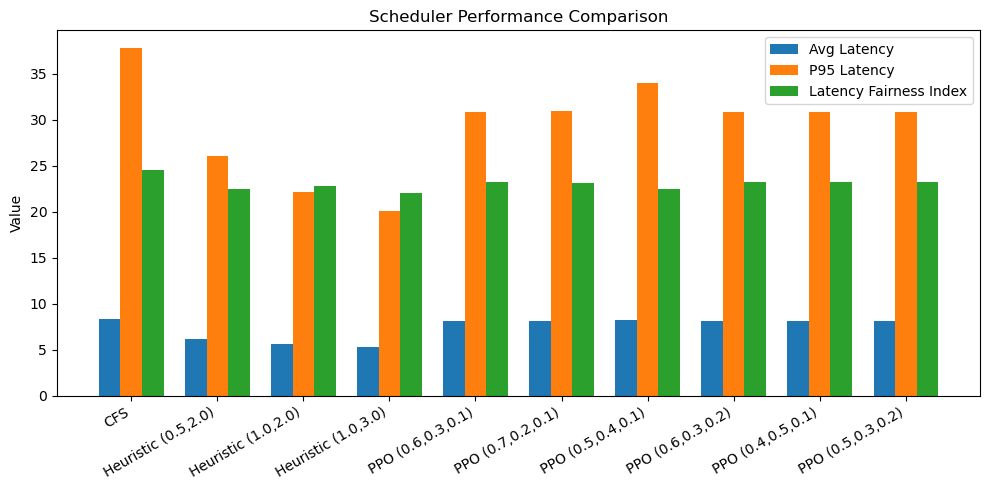

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
x = range(len(df))
ax.bar(x, df['avg_latency'], width=0.25, label='Avg Latency')
ax.bar([i + 0.25 for i in x], df['p95'], width=0.25, label='P95 Latency')
ax.bar([i + 0.5 for i in x], df['lfi']*100, width=0.25, label='Latency Fairness Index')

ax.set_xticks([i + 0.25 for i in x])
ax.set_xticklabels(df['policy'], rotation=30, ha='right')
ax.set_ylabel("Value")
ax.set_title("Scheduler Performance Comparison")
ax.legend()
plt.tight_layout()
plt.savefig("results.pdf", format="pdf")
plt.show()

In [ ]:
#sim_minimal.py

avg = 10.340554237365723
p95 = 30.79988288879383
completed = 1408

#sim_extended.py
avg = 9.752694129943848
p95 = 42.12178630828857
completed = 1408

avg = 10.223938941955566
p95 = 43.07757892608626
completed = 1408



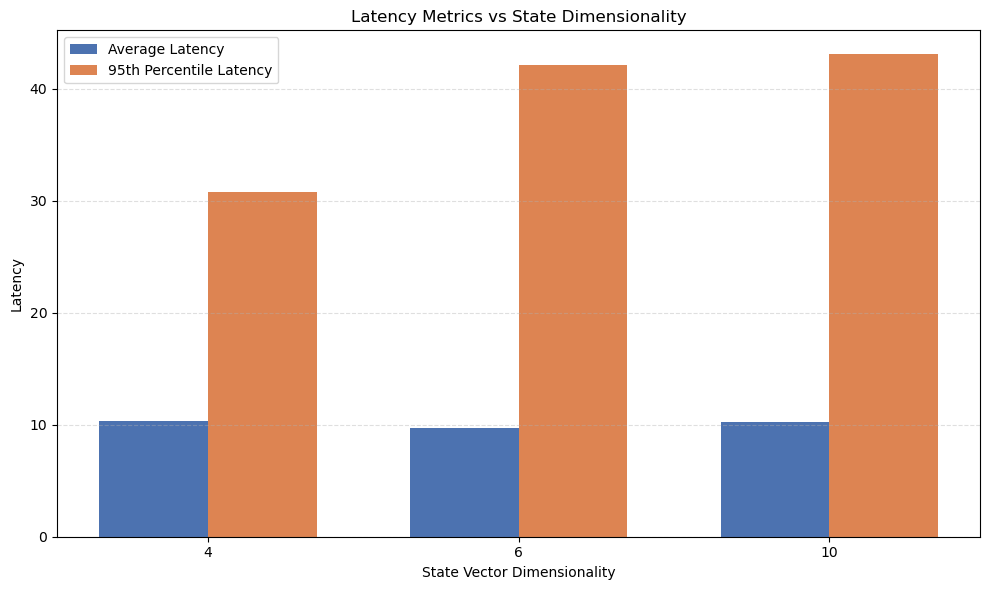

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
state_dims = [4, 6, 10]

avg_latencies = [
    10.340554237365723,
    9.752694129943848,
    10.223938941955566
]

p95_latencies = [
    30.79988288879383,
    42.12178630828857,
    43.07757892608626
]

x = np.arange(len(state_dims))  # [0,1,2]
width = 0.35                    # width of each bar

plt.figure(figsize=(10,6))

plt.bar(x - width/2, avg_latencies, width,
        label="Average Latency",
        color="#4C72B0")

plt.bar(x + width/2, p95_latencies, width,
        label="95th Percentile Latency",
        color="#DD8452")

plt.xticks(x, state_dims)
plt.xlabel("State Vector Dimensionality")
plt.ylabel("Latency")
plt.title("Latency Metrics vs State Dimensionality")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig("latency_vs_state_dim_grouped.pdf", format="pdf")
plt.show()
